<h2 align=center>Analyze Worldwide Box Office Data with Seaborn and Python (Part 1)</h2>
<img src="revenue.png">

### Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import datetime
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, KFold
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import json
import ast
from urllib.request import urlopen
from PIL import Image

[nltk_data] Downloading package stopwords to /home/rhyme/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Task 1: Data Loading and Exploration

In [6]:
# importing data using read_csv method of pandas.
train = pd.read_csv('data/train.csv') 
test = pd.read_csv('data/test.csv')

In [7]:
# displaying the first few rows of the TRAINING dataset
train.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,Keywords,revenue,collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,production_company_TriStar Pictures,production_company_Relativity Media,production_company_Canal+,production_company_United Artists,production_company_Miramax Films,production_company_Village Roadshow Pictures,production_company_Regency Enterprises,production_company_BBC Films,production_company_Dune Entertainment,production_company_Working Title Films,production_company_Fox Searchlight Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks SKG,production_company_Fox 2000 Pictures,production_company_Summit Entertainment,production_company_Hollywood Pictures,production_company_Orion Pictures,production_company_Amblin Entertainment,production_company_Dimension Films,num_countries,production_country_United States of America,production_country_United Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Italy,production_country_Japan,production_country_Australia,production_country_Russia,production_country_Spain,production_country_China,production_country_Hong Kong,production_country_Ireland,production_country_Belgium,production_country_South Korea,production_country_Mexico,production_country_Sweden,production_country_New Zealand,production_country_Netherlands,production_country_Czech Republic,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,num_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,language_Nederlands,language_فارسی,language_Tiếng Việt,language_اردو,language_Română,num_cast,cast_name_Samuel L. Jackson,cast_name_Robert De Niro,cast_name_Morgan Freeman,cast_name_J.K. Simmons,cast_name_Bruce Willis,cast_name_Liam Neeson,cast_name_Susan Sarandon,cast_name_Bruce McGill,cast_name_John Turturro,cast_name_Forest Whitaker,cast_name_Willem Dafoe,cast_name_Bill Murray,cast_name_Owen Wilson,cast_name_Nicolas Cage,cast_name_Sylvester Stallone,genders_0_cast,genders_1_cast,genders_2_cast,cast_character_,cast_character_Himself,cast_character_Herself,cast_character_Dancer,cast_character_Additional Voices (voice),cast_character_Doctor,cast_character_Reporter,cast_character_Waitress,cast_character_Nurse,cast_character_Bartender,cast_character_Jack,cast_character_Debutante,cast_character_Security Guard,cast_character_Paul,cast_character_Frank,num_crew,crew_name_Avy Kaufman,crew_name_Robert Rodriguez,crew_name_Deborah Aquila,crew_name_James Newton Howard,crew_name_Mary Vernieu,crew_name_Steven Spielberg,crew_name_Luc Besson,crew_name_Jerry Goldsmith,crew_name_Francine Maisler,crew_name_Tricia Wood,crew_name_James Horner,crew_name_Kerry Barden,crew_name_Bob Weinstein,crew_name_Harvey Weinstein,crew_name_Janet Hirshenson,genders_0_crew,genders_1_crew,genders_2_crew,jobs_

### Task 2: Visualizing the Target Distribution

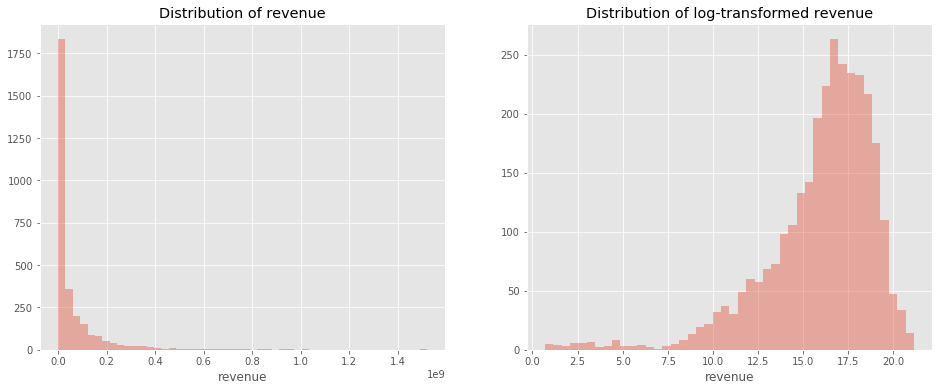

In [10]:
# preparing a histogram of the dataset using hist function in pandas
# the column selected is revenue from training dataset.
# train.revenue.hist()
# this distribution looks a bit skewed and needs to be normalized.

# we'll use seaborn to form subplots of this distribution 
# to see the original as well as the normaliized/logarithmic dist for better prediction. 
# use subplot function of matplotlib which is imported as plt
# axes is defined and figure size i.e the size of each subplot is passed for  better display.
fig, ax  = plt.subplots(figsize=(16,6)) 
# now the layout of the subplots will be defined.
# the parameters passed in the method show 1 plot, 2 columns and 1 row.
plt.subplot(1,2,1)
# for visualization, we call distplot function from seaborn (sns) instead of hist func from pandas
# the column around which we are working will be passed as a parameter
# since we dont want to clutter our visualization we set the kernel density estimate to false.
sns.distplot(train['revenue'], kde=False);
# now set a title for the plot
plt.title('Distribution of revenue');

# now create a second subplot for dist of log tranformed revenue
plt.subplot(1,2,2)
# to transform it logarithmically, use log1p method of numpy for getting no 0s and infinities.
sns.distplot(np.log1p(train['revenue']), kde=False);
plt.title('Distribution of log-transformed revenue');

In [12]:
# now create a new feature in the train dataset.
train['log_revenue']=np.log1p(train['revenue'])


### Task 3: Relationship between Film Revenue and Budget

Text(0.5, 1.0, 'Distribution of log transformed data')

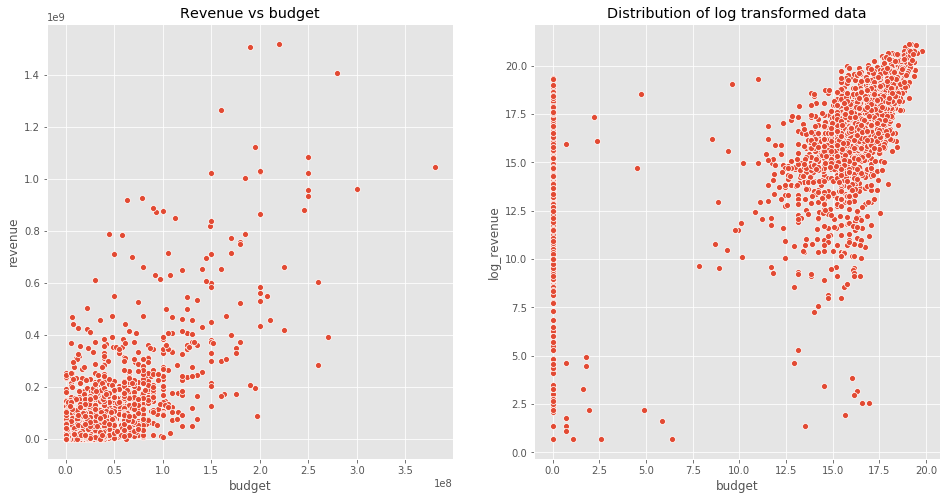

In [18]:
# analysing the relationship between film revenue and budget.
# creating scattered plot using seaborn
# this is the command for to display:
# sns.scatterplot(train['budget'], train['revenue'])

# creating a plot(not log trans)
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.scatterplot(train['budget'], train['revenue'])
plt.title('Revenue vs budget')

# creating a log transformed plot.
plt.subplot(1,2,2)
# use np.log1p for creating log transformation of budget. 
# we already saved log trans of revenue so it can be used directly.
sns.scatterplot(np.log1p(train['budget']), train['log_revenue'])
plt.title('Distribution of log transformed data')

In [21]:
# adding log data as a column to train data
train['log_budget']=np.log1p(train['budget'])
test['log_budget']=np.log1p(test['budget'])

### Task 4: Does having an Official Homepage Affect Revenue?

In [22]:
# we'll be checking if a homepage affects the revenue of the movie or not.

# fetch some of the most common homepages from the training dataset and the number of times they occur.
# done by using values.count and head method of pandas.
train['homepage'].value_counts().head(10)

http://www.transformersmovie.com/              4
http://www.lordoftherings.net/                 2
http://www.thehobbit.com/                      2
http://www.bbc.co.uk/programmes/p00t8qnw       1
http://www.threestooges.com/movie/index.htm    1
http://www.atlasshruggedmovie.com/             1
http://www.four-lions.co.uk/                   1
http://www.wardogsthemovie.com/                1
http://www.imnotthere-movie.com/               1
http://americanhoneymovie.com/                 1
Name: homepage, dtype: int64

In [24]:
# now we'll create a feature which returns 1 if there exists a homepage for the movie and 0 otherwise.
train['has_homepage']=0
train.loc[train['homepage'].isnull() == False, 'has_homepage']=1
test['has_homepage']=0
test.loc[test['homepage'].isnull() == False, 'has_homepage']=1

Text(0.5, 1.0, 'Revenue for movies with and without a homepage.')

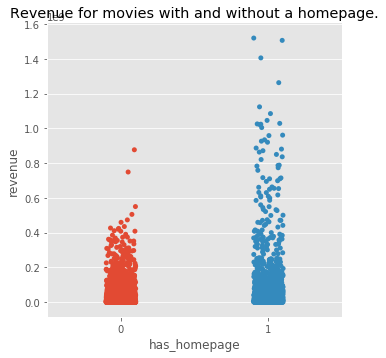

In [25]:
# visualization using cat plot from seaborn.
sns.catplot(x='has_homepage', y='revenue', data=train);
plt.title('Revenue for movies with and without a homepage.')

### Task 5: Distribution of Languages in Film

In [33]:
# we'll use box plot for dist of languages and how they affect revenue.
# we'll focus on top 10 languages.
# train.loc for locating
# isin to check if the data is in the column and then applied value_counts and specified head as 10.
# index() since we are focusing on top 10 from ALL ENTRIES.
# save in language_data
language_data=train.loc[train['original_language'].isin(train['original_language'].value_counts().head(10)).index]

Text(0.5, 1.0, 'mean log transf revenue per language.')

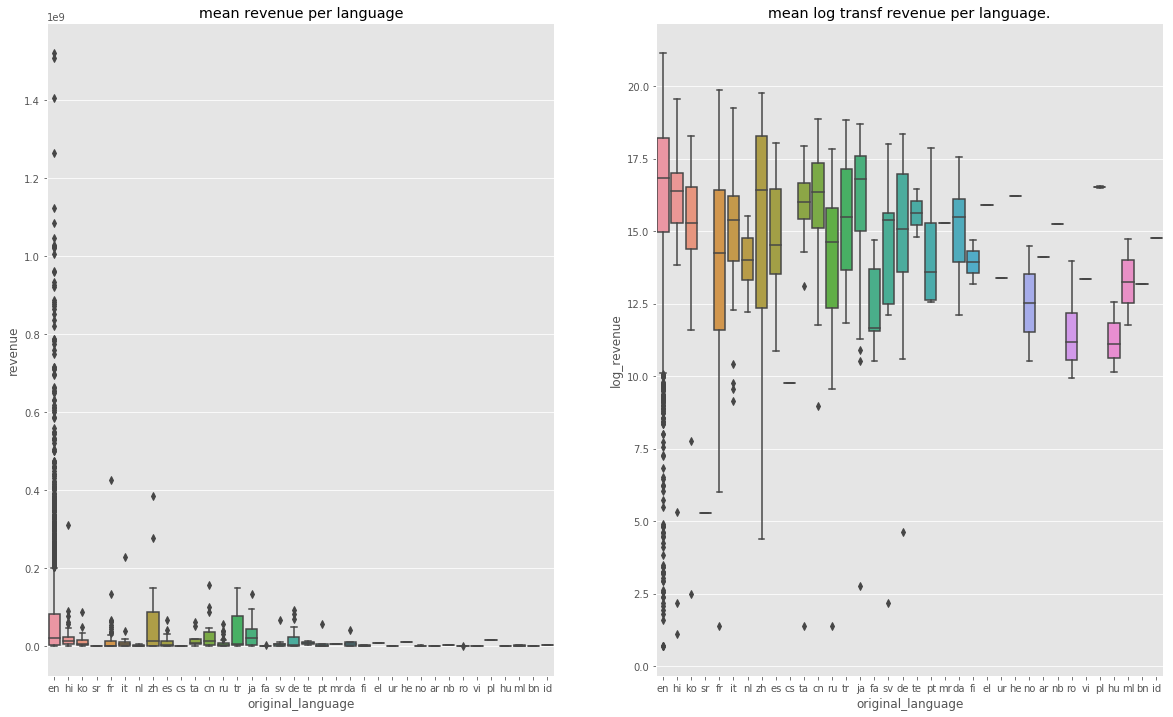

In [37]:
plt.figure(figsize=(20, 12))
# visualize using boxplot
# first, the original data
plt.subplot(1,2,1)
sns.boxplot(x='original_language', y='revenue', data=language_data)
plt.title('mean revenue per language')
# now the normalized one/log trans
plt.subplot(1,2,2)
sns.boxplot(x='original_language', y='log_revenue', data=language_data)
plt.title('mean log transf revenue per language.')


### Task 6: Frequent Words in Film Titles and Descriptions

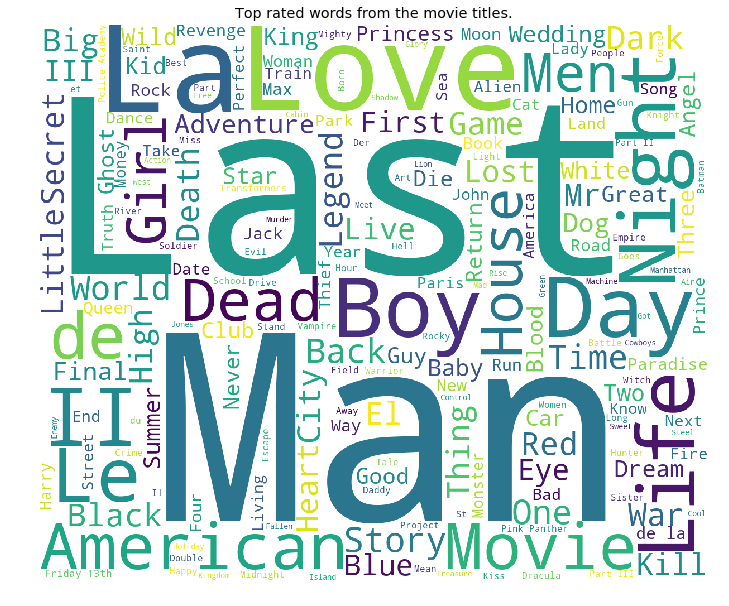

In [40]:
plt.figure(figsize=(12,12))
# split the title name by space to get the words.
text=' '.join(train['original_title'].values)
# create a wordcloud
wordcloud=WordCloud(max_font_size=None,
                   background_color='white',
                   width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top rated words from the movie titles.')
plt.axis('off')
plt.show()

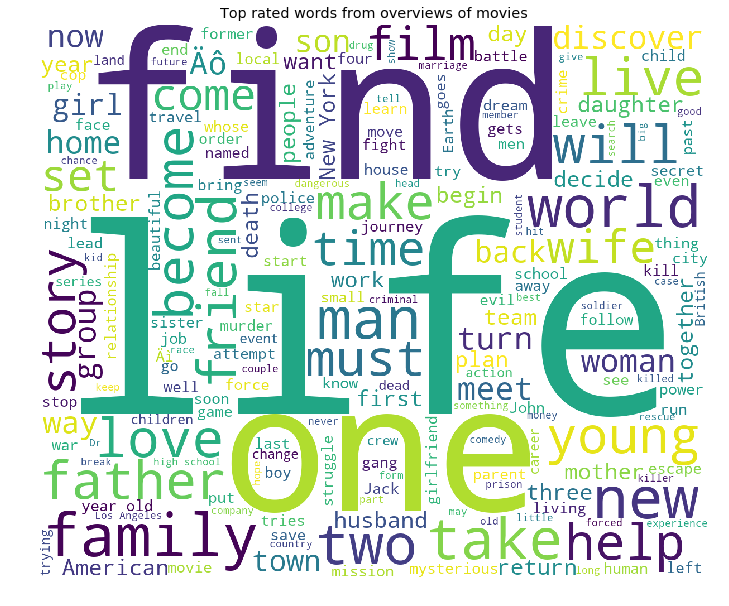

In [41]:
# now create a wordcloud for the overview of movies.
# also run the null values with empty string.
plt.figure(figsize=(12,12))
text= ' '.join(train['overview'].fillna('').values)
wordcloud = WordCloud(max_font_size=None,
                     background_color='white',
                     width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top rated words from overviews of movies')
plt.axis('off')
plt.show()

### Task 7: Do Film Descriptions Impact Revenue?

In [42]:
import eli5
from sklearn.linear_model import LinearRegression

In [48]:
vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 2),
    min_df=5
)
overview_text=vectorizer.fit_transform(train['overview'].fillna(''))
linreg=LinearRegression()
linreg.fit(overview_text,train['log_revenue'])
eli5.show_weights(linreg, vec=vectorizer, top=20, feature_filter=lambda x: x!='<BIAS>')